<a href="https://colab.research.google.com/github/narindagenta/BigData/blob/main/BDpert14_Apyori_pyFPGrowth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!pip install apyori
!pip install pyfpgrowth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
import pandas as pd
import pyfpgrowth
import seaborn as sns
from apyori import apriori 

#Import Dataset from Kagle
Source dataset : https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset

In [47]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [ ]:
!kaggle datasets download -d heeraldedhia/groceries-dataset

  0% 0.00/257k [00:00<?, ?B/s]
100% 257k/257k [00:00<00:00, 80.8MB/s]


In [49]:
!unzip /content/groceries-dataset.zip

Archive:  /content/groceries-dataset.zip
replace Groceries_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Groceries_dataset.csv   


#Data Initation
##Analysis of Dataset

In [136]:
data = pd.read_csv('/content/Groceries_dataset.csv', engine='python')

In [137]:
data.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [104]:
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [106]:
data.shape

(38765, 3)

###Encode Label

In [107]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('/content/Groceries_dataset.csv')
encoder = LabelEncoder()
df['itemDescription'] = encoder.fit_transform(df['itemDescription'])
itemDescription  = {index : label for index, label in enumerate(encoder.classes_)}
itemDescription

{0: 'Instant food products',
 1: 'UHT-milk',
 2: 'abrasive cleaner',
 3: 'artif. sweetener',
 4: 'baby cosmetics',
 5: 'bags',
 6: 'baking powder',
 7: 'bathroom cleaner',
 8: 'beef',
 9: 'berries',
 10: 'beverages',
 11: 'bottled beer',
 12: 'bottled water',
 13: 'brandy',
 14: 'brown bread',
 15: 'butter',
 16: 'butter milk',
 17: 'cake bar',
 18: 'candles',
 19: 'candy',
 20: 'canned beer',
 21: 'canned fish',
 22: 'canned fruit',
 23: 'canned vegetables',
 24: 'cat food',
 25: 'cereals',
 26: 'chewing gum',
 27: 'chicken',
 28: 'chocolate',
 29: 'chocolate marshmallow',
 30: 'citrus fruit',
 31: 'cleaner',
 32: 'cling film/bags',
 33: 'cocoa drinks',
 34: 'coffee',
 35: 'condensed milk',
 36: 'cooking chocolate',
 37: 'cookware',
 38: 'cream',
 39: 'cream cheese ',
 40: 'curd',
 41: 'curd cheese',
 42: 'decalcifier',
 43: 'dental care',
 44: 'dessert',
 45: 'detergent',
 46: 'dish cleaner',
 47: 'dishes',
 48: 'dog food',
 49: 'domestic eggs',
 50: 'female sanitary products',
 51: 

In [127]:
data['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

#Training Algorithm

##Apyori algorithm


In [128]:
products = data['itemDescription'].unique()
dummy = pd.get_dummies(data['itemDescription'])
data.drop(['itemDescription'], inplace =True, axis=1)

data = data.join(dummy)

data.head()

,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [129]:
data1 = data.groupby(['Member_number', 'Date'])[products[:]].sum()
data1 = data1.reset_index()[products]

print("New Dimension", data1.shape)
data1.head()

New Dimension (14963, 167)


,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
def productnames(x):
    for product in products:
        if x[product] >0:
            x[product] = product
    return x

data1 = data1.apply(productnames, axis=1)
data1.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
x = data1.values
x = [sub[~(sub==0)].tolist() for sub in x if sub [sub != 0].tolist()]
transactions = x
transactions[0:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [84]:
rules = apriori(transactions, min_support = 0.00030, min_confidence = 0.05, min_lift = 3, max_length = 2, target = "rules")
association_results = list(rules)

In [85]:
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'fruit/vegetable juice', 'liver loaf'})
frozenset({'ham', 'pickled vegetables'})
frozenset({'meat', 'roll products '})
frozenset({'salt', 'misc. beverages'})
frozenset({'spread cheese', 'misc. beverages'})
frozenset({'seasonal products', 'soups'})
frozenset({'spread cheese', 'sugar'})


In [86]:
print("There are {} Relation derived.".format(len(association_results)))


There are 7 Relation derived.


In [87]:
for item in association_results:
    
    pair = item[0]
    items = [x for x in pair]
    
    print("Rule : ", items[0], " -> " + items[1])
    print("Support : ", str(item[1]))
    print("Confidence : ",str(item[2][0][2]))
    print("Lift : ", str(item[2][0][3]))
    
    print("--------------------------------") 

Rule :  fruit/vegetable juice  -> liver loaf
Support :  0.00040098910646260775
Confidence :  0.12
Lift :  3.5276227897838903
--------------------------------
Rule :  ham  -> pickled vegetables
Support :  0.0005346521419501437
Confidence :  0.05970149253731344
Lift :  3.4895055970149254
--------------------------------
Rule :  meat  -> roll products 
Support :  0.0003341575887188398
Confidence :  0.06097560975609757
Lift :  3.620547812620984
--------------------------------
Rule :  salt  -> misc. beverages
Support :  0.0003341575887188398
Confidence :  0.05617977528089888
Lift :  3.5619405827461437
--------------------------------
Rule :  spread cheese  -> misc. beverages
Support :  0.0003341575887188398
Confidence :  0.05
Lift :  3.170127118644068
--------------------------------
Rule :  seasonal products  -> soups
Support :  0.0003341575887188398
Confidence :  0.10416666666666667
Lift :  14.704205974842768
--------------------------------
Rule :  spread cheese  -> sugar
Support :  0.0

##FP Growth Algorithm

In [ ]:
transactions[0:5]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables']]

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(transactions, 10)
patterns
sorted_patterns = {key: value for key, value in sorted(patterns.items(), key=lambda item: item[1],reverse=True)}

sorted_patterns

{('whole milk',): 2363,
 ('other vegetables',): 1827,
 ('other vegetables', 'whole milk'): 222,
 ('rolls/buns', 'whole milk'): 209,
 ('soda', 'whole milk'): 174,
 ('whole milk', 'yogurt'): 167,
 ('other vegetables', 'rolls/buns'): 158,
 ('other vegetables', 'soda'): 145,
 ('sausage', 'whole milk'): 134,
 ('packaged fruit/vegetables',): 127,
 ('tropical fruit', 'whole milk'): 123,
 ('other vegetables', 'yogurt'): 121,
 ('rolls/buns', 'yogurt'): 117,
 ('root vegetables', 'whole milk'): 113,
 ('bottled beer', 'whole milk'): 107,
 ('citrus fruit', 'whole milk'): 107,
 ('bottled water', 'whole milk'): 107,
 ('pip fruit', 'whole milk'): 99,
 ('pastry', 'whole milk'): 97,
 ('shopping bags', 'whole milk'): 95,
 ('other vegetables', 'tropical fruit'): 94,
 ('frozen dessert',): 92,
 ('rolls/buns', 'tropical fruit'): 91,
 ('canned beer', 'whole milk'): 90,
 ('other vegetables', 'sausage'): 90,
 ('salt',): 89,
 ('soda', 'yogurt'): 87,
 ('rolls/buns', 'root vegetables'): 86,
 ('pet care',): 85,
 ('

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.02)
rules

{('brandy',): (('whole milk',), 0.34210526315789475),
 ('softener',): (('whole milk',), 0.2926829268292683),
 ('house keeping products',): (('whole milk',), 0.24444444444444444),
 ('chocolate marshmallow',): (('whole milk',), 0.16666666666666666),
 ('finished products',): (('whole milk',), 0.203125),
 ('candles',): (('whole milk',), 0.16666666666666666),
 ('dog food',): (('whole milk',), 0.14925373134328357),
 ('dish cleaner',): (('whole milk',), 0.1780821917808219),
 ('cling film/bags',): (('whole milk',), 0.13513513513513514),
 ('turkey',): (('whole milk',), 0.1375),
 ('roll products ',): (('whole milk',), 0.12195121951219512),
 ('canned vegetables',): (('whole milk',), 0.17073170731707318),
 ('pet care',): (('whole milk',), 0.12941176470588237),
 ('frozen dessert',): (('whole milk',), 0.15217391304347827),
 ('packaged fruit/vegetables',): (('rolls/buns',), 0.14173228346456693),
 ('other vegetables',): (('whole milk',), 0.12151067323481117),
 ('whole milk',): (('other vegetables',), 

#Visualisasi Data

Text(0.5, 1.0, 'Best Sellers')

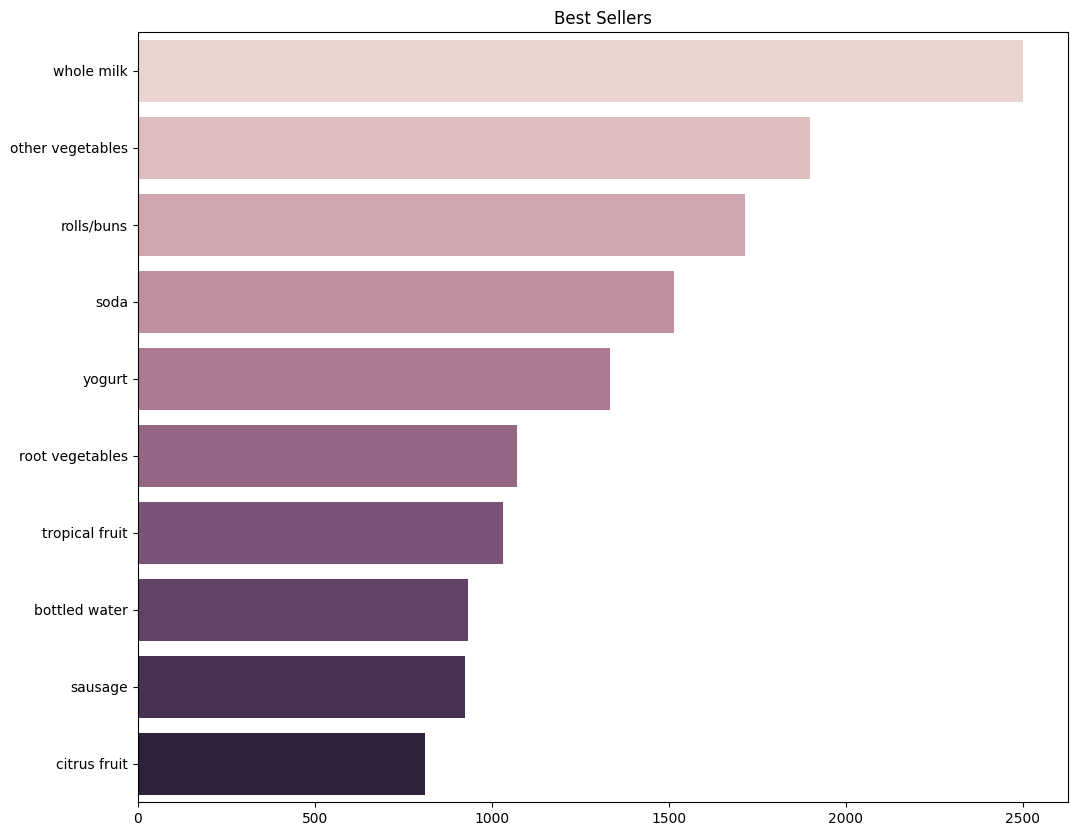

In [115]:
x = list(data['itemDescription'].value_counts()[:10].values)
y = list(data['itemDescription'].value_counts()[:10].index)

plt.figure(figsize=(12,10))
ax=sns.barplot(x=x,y=y, palette=sns.cubehelix_palette(len(x)))
plt.title('Best Sellers')

In [138]:
#Arranging the dataset to see the most bought product in the given time
most_bought=df.drop(['Member_number','Date'],axis=1)
most_bought=most_bought.value_counts()

#Taking the TOP 15 products
top15=most_bought.head(15)

#Taking the BOTTOM 15 products
bo15=most_bought.tail(15)
bo15=bo15.sort_values(ascending=True)

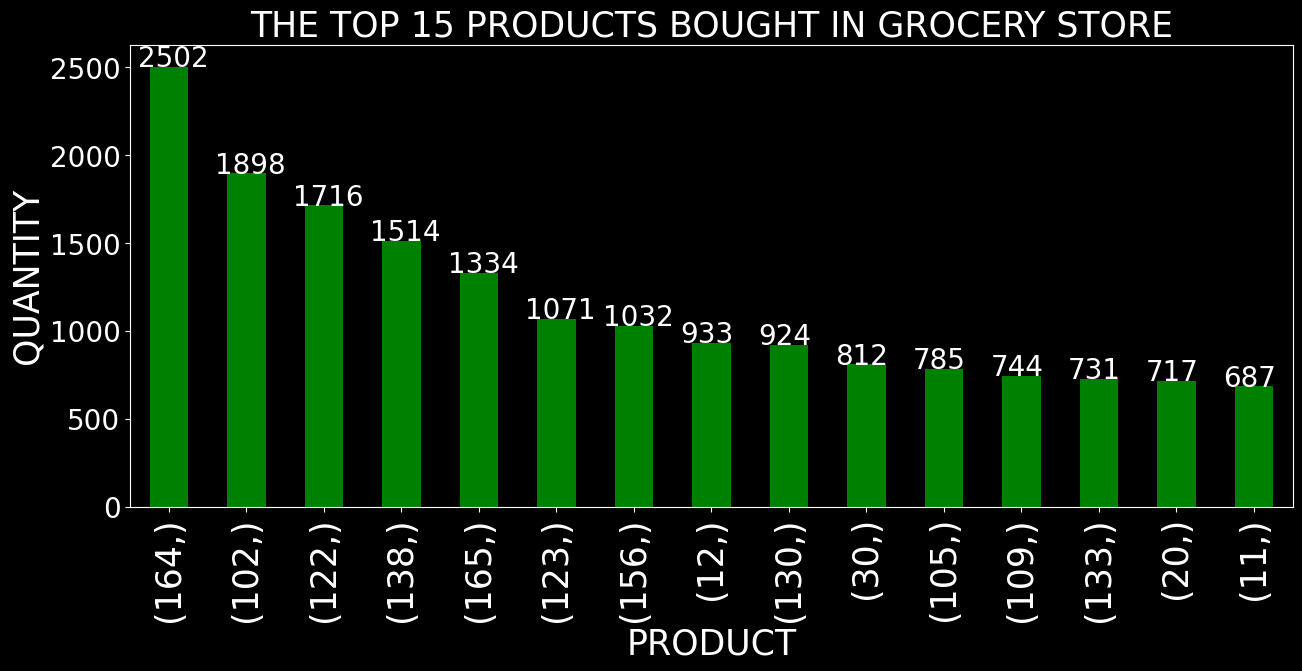

In [139]:
import matplotlib as mpl
mpl.style.use('dark_background')

#Plotting the bar chart for the most bought products
import matplotlib.pyplot as plt

top15.plot(kind='bar',figsize=(15,6),rot=90,color='green')

plt.title('THE TOP 15 PRODUCTS BOUGHT IN GROCERY STORE',fontsize=25)
plt.xlabel('PRODUCT',fontsize=25)
plt.ylabel('QUANTITY',fontsize=25)
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=20) 

#LABELING
for index, value in enumerate(top15): 
    plt.annotate(value, xy=(index-0.4,value),color='white',fontsize=20)

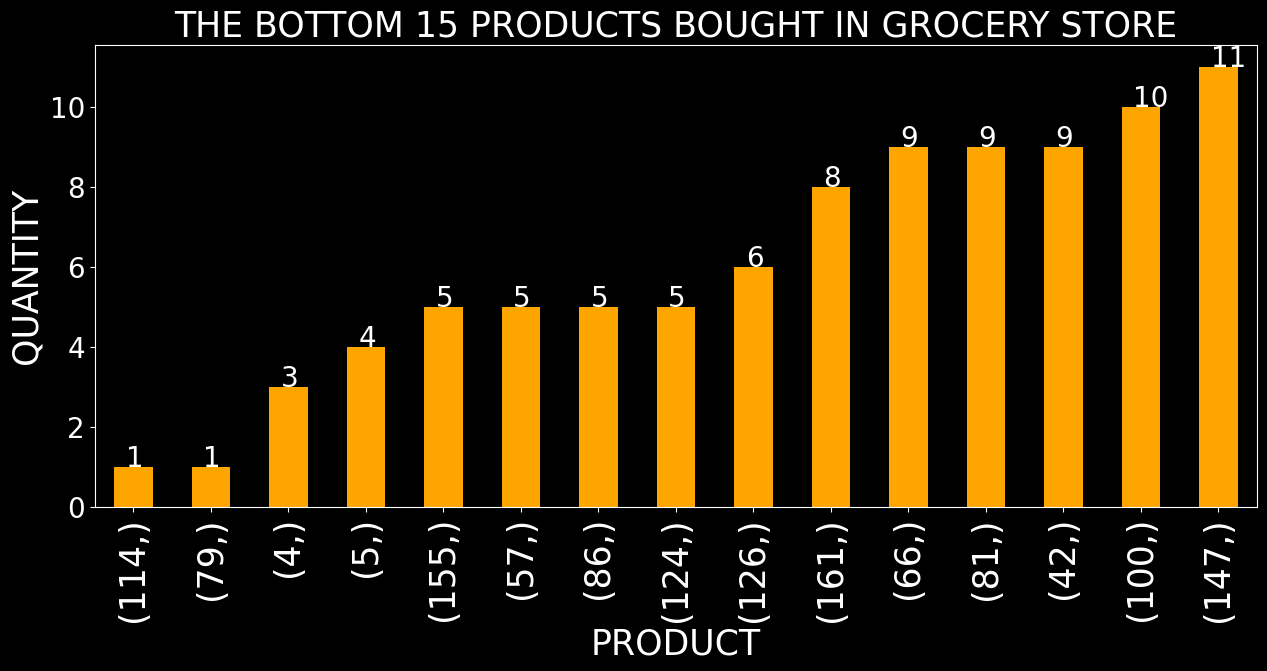

In [135]:
#Plotting the bar chart for the least bought products

bo15.plot(kind='bar',figsize=(15,6),rot=90,color='orange')

plt.title('THE BOTTOM 15 PRODUCTS BOUGHT IN GROCERY STORE',fontsize=25)
plt.xlabel('PRODUCT',fontsize=25)
plt.ylabel('QUANTITY',fontsize=25)
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=20) 

#LABELING
for index, value in enumerate(bo15): 
    plt.annotate(value, xy=(index-0.1,value),color='white',fontsize=20)